<a href="https://colab.research.google.com/github/srujannayak32/MLLAB189/blob/main/UNIT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Simple Perceptron (basic code)


In [1]:
import numpy as np

class SimplePerceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                y_pred = self.predict(xi)
                error = target - y_pred
                self.weights[1:] += self.lr * error * xi
                self.weights[0] += self.lr * error

# Example: OR gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

perceptron = SimplePerceptron(input_size=2, lr=0.1, epochs=10)
perceptron.train(X, y)

print("Weights:", perceptron.weights)
for xi in X:
    print(f"Input: {xi}, Predicted: {perceptron.predict(xi)}")

Weights: [-0.1  0.1  0.1]
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 1


2.Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)

In [2]:
import matplotlib.pyplot as plt

def perceptron_gate(X, y, lr=0.1, epochs=10):
    w = np.zeros(X.shape[1] + 1)
    for _ in range(epochs):
        for xi, target in zip(X, y):
            z = np.dot(xi, w[1:]) + w[0]
            pred = 1 if z >= 0 else 0
            error = target - pred
            w[1:] += lr * error * xi
            w[0] += lr * error
    return w

# AND, OR
X_linear = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
y_or = np.array([0,1,1,1])

w_and = perceptron_gate(X_linear, y_and)
w_or = perceptron_gate(X_linear, y_or)
print("AND Weights:", w_and)
print("OR Weights:", w_or)

# XOR (non-linear) - cannot be solved by single perceptron
y_xor = np.array([0,1,1,0])
w_xor = perceptron_gate(X_linear, y_xor)
print("XOR Weights (fails for non-linear):", w_xor)

AND Weights: [-0.2  0.2  0.1]
OR Weights: [-0.1  0.1  0.1]
XOR Weights (fails for non-linear): [ 0.  -0.1  0. ]


3. MLP with single hidden Layer (with various number of neurons)

In [3]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Example dataset: XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])  # XOR problem (non-linear)

# Number of neurons to test
neurons_list = [1, 2, 5, 10, 20]

for n in neurons_list:
    # Create MLP with single hidden layer of n neurons
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='relu', solver='adam', max_iter=1000, random_state=42)

    # Train the model
    mlp.fit(X, y)

    # Predictions
    predictions = mlp.predict(X)

    # Output results
    print(f"Hidden Neurons: {n}")
    print("Predictions:", predictions)
    print("Training Loss:", round(mlp.loss_, 4))
    print("Number of Iterations:", mlp.n_iter_)
    print("-"*40)

Hidden Neurons: 1
Predictions: [0 1 0 1]
Training Loss: 0.7182
Number of Iterations: 217
----------------------------------------
Hidden Neurons: 2
Predictions: [1 1 1 1]
Training Loss: 0.6953
Number of Iterations: 207
----------------------------------------
Hidden Neurons: 5
Predictions: [0 1 0 1]
Training Loss: 0.6996
Number of Iterations: 12
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Neurons: 10
Predictions: [0 1 1 0]
Training Loss: 0.3909
Number of Iterations: 1000
----------------------------------------
Hidden Neurons: 20
Predictions: [0 1 1 0]
Training Loss: 0.1914
Number of Iterations: 1000
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4.MLP on MNIST dataset and display its train and test data score.

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=20, random_state=42)
mlp.fit(X_train, y_train)

train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score: 0.9992
Test Score: 0.9656


5. Find the relation between learning rate and loss (or) number  of iterations and loss.

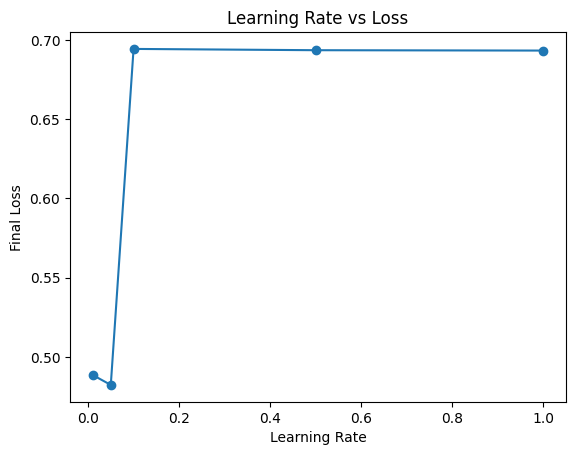

In [5]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Example dataset: XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
losses = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='sgd', learning_rate_init=lr, max_iter=500, random_state=42)
    mlp.fit(X, y)
    losses.append(mlp.loss_)

plt.plot(learning_rates, losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss")
plt.title("Learning Rate vs Loss")
plt.show()

6. Find the relation between number of neurons with learning rate and iterations.

In [6]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd

# Example dataset: XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Hyperparameters to test
neurons_list = [1, 2, 5, 10]
learning_rates = [0.01, 0.1, 0.5]
iterations = [50, 100, 200]

results = []

for n in neurons_list:
    for lr in learning_rates:
        for it in iterations:
            mlp = MLPClassifier(hidden_layer_sizes=(n,), solver='sgd', learning_rate_init=lr, max_iter=it, random_state=42)
            mlp.fit(X, y)
            results.append({
                "Neurons": n,
                "Learning Rate": lr,
                "Iterations": it,
                "Loss": mlp.loss_})

df = pd.DataFrame(results)
print(df)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.

    Neurons  Learning Rate  Iterations      Loss
0         1           0.01          50  0.710589
1         1           0.01         100  0.703591
2         1           0.01         200  0.703234
3         1           0.10          50  0.693789
4         1           0.10         100  0.693789
5         1           0.10         200  0.693789
6         1           0.50          50  0.693363
7         1           0.50         100  0.693363
8         1           0.50         200  0.693363
9         2           0.01          50  0.669431
10        2           0.01         100  0.623380
11        2           0.01         200  0.533531
12        2           0.10          50  0.694244
13        2           0.10         100  0.694244
14        2           0.10         200  0.694244
15        2           0.50          50  0.693433
16        2           0.50         100  0.693433
17        2           0.50         200  0.693433
18        5           0.01          50  0.697545
19        5         

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
